# A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [49]:
import pandas as pd

In [50]:
#Read 
file = 'data_120s_middle.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(1035, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.926209,13.066208,6.341759,0.191187,0.084679,25.695114,71.829575,2.878260,3.380372,21.690620,...,2.077109,0.851387,0.606503,0.603094,0.641322,0.600043,0.184244,434.193115,0.894638,suaraarchive
1,0.801614,12.663761,6.788875,0.196887,0.120882,68.848587,261.223206,3.911703,5.752195,28.230555,...,2.296762,0.789114,0.592504,0.616169,0.657935,0.554073,0.183572,434.193115,0.836342,suaraarchive
2,0.958840,15.589139,6.508586,0.194571,0.095030,29.897995,58.242626,3.597182,3.494998,20.671581,...,2.025024,0.732502,0.521595,0.536178,0.552483,0.614134,0.262139,434.193115,0.973183,suaraarchive
3,0.959844,16.034716,5.544224,0.186143,0.103511,63.320503,138.582840,4.787662,4.979610,32.127037,...,2.109402,0.685352,0.594553,0.583237,0.558795,0.545474,0.257773,434.193115,0.909519,suaraarchive
4,0.921126,14.520344,5.613762,0.258785,0.145858,43.360104,71.030136,4.291251,3.558462,15.687524,...,2.302892,0.839513,0.645181,0.642214,0.641815,0.516301,0.186468,434.193115,0.906785,suaraarchive


In [51]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

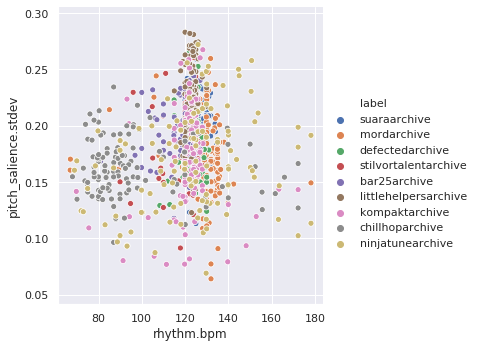

In [52]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

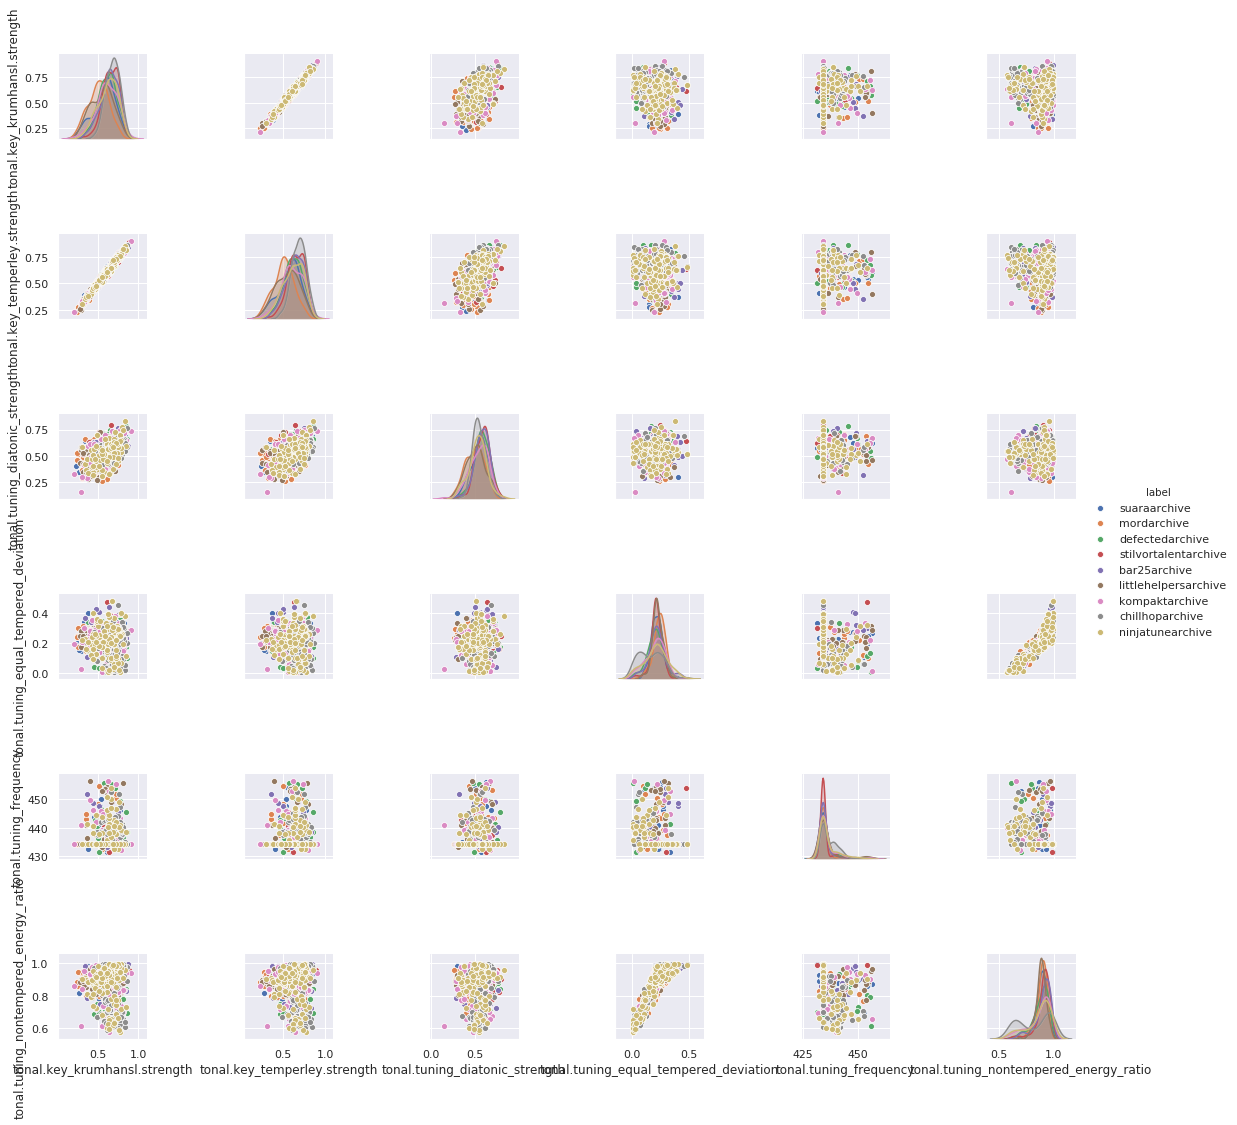

In [53]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [54]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.890201,14.935606,5.898620,0.244669,0.106513,54.088453,127.741148,3.906587,3.896056,16.468246,...,5.840052,2.141102,0.736631,0.610856,0.611547,0.609458,0.545541,0.209442,435.987566,0.880666
std,0.144201,2.327661,0.990030,0.065235,0.029463,49.942625,137.631808,1.530592,1.707767,7.596154,...,1.071928,0.330817,0.084112,0.126312,0.127043,0.125991,0.099242,0.077702,4.288373,0.090137
min,0.008222,7.970547,2.097549,0.094289,0.019667,0.575930,1.329556,0.363683,0.492390,1.397313,...,3.554723,0.983317,0.431894,0.217340,0.214792,0.231318,0.148636,0.003007,431.193909,0.574467
25%,0.877556,13.278876,5.300707,0.199302,0.087329,23.578614,48.871532,2.851759,2.721699,11.030886,...,5.021384,1.926125,0.685437,0.534042,0.534373,0.527755,0.485490,0.175766,434.193115,0.854294
50%,0.941992,14.839335,5.939125,0.233936,0.104207,40.146778,90.225769,3.700024,3.608230,15.800435,...,5.661469,2.123285,0.736084,0.625401,0.623180,0.623213,0.549781,0.215466,434.193115,0.904616
75%,0.969729,16.492444,6.551336,0.279730,0.122748,69.321213,163.269394,4.860611,4.872870,21.265889,...,6.482606,2.355068,0.789581,0.702952,0.705218,0.705748,0.615395,0.255962,434.193115,0.939795
max,0.989183,22.913223,8.855705,0.513426,0.246347,637.863342,1957.345581,10.983255,12.527313,44.947048,...,9.563560,3.419730,1.066155,0.903548,0.910280,0.897878,0.832011,0.478299,456.570251,0.997084




### Preprocessing of the features

**Normalisation of the features**

In [55]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [56]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.899097,0.466119,0.562442,0.358786,0.383123,0.083969,0.064627,0.333620,0.282816,0.346063,...,0.380328,0.475200,0.480461,0.573465,0.570470,0.567301,0.580801,0.434334,0.188903,0.724531
std,0.147000,0.155773,0.146494,0.155640,0.129976,0.078368,0.070363,0.144129,0.141901,0.174425,...,0.178392,0.135780,0.132614,0.184072,0.182667,0.189017,0.145223,0.163483,0.168991,0.213283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.886207,0.355246,0.473969,0.250545,0.298494,0.036095,0.024306,0.234292,0.185237,0.221209,...,0.244084,0.386965,0.399746,0.461525,0.459507,0.444726,0.492926,0.363481,0.118189,0.662128
50%,0.951893,0.459676,0.568436,0.333179,0.372949,0.062093,0.045448,0.314169,0.258900,0.330728,...,0.350608,0.467888,0.479598,0.594660,0.587197,0.587937,0.587005,0.447008,0.118189,0.781201
75%,0.980168,0.570306,0.659024,0.442435,0.454743,0.107872,0.082791,0.423457,0.363981,0.456227,...,0.487263,0.563021,0.563943,0.707673,0.705153,0.711759,0.683019,0.532210,0.118189,0.864441
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.93580427 0.34101393 0.62801305 ... 0.38131671 0.11818908 0.75759114]
 [0.80879063 0.31408122 0.69417249 ... 0.37990413 0.11818908 0.61965133]
 [0.96906839 0.50985458 0.65269836 ... 0.54520691 0.11818908 0.94344488]
 ...
 [0.97863644 0.52371229 0.80573315 ... 0.42208924 0.11818908 0.79872161]
 [0.83991443 0.16298914 0.21044934 ... 0.05694345 0.49790387 0.25548031]
 [0.62207931 0.41072908 0.39905389 ... 0.64093708 0.11818908 0.97710194]]
Class of the first sample:  8


In [58]:
print(y.shape)

(1035,)


In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print k best features

                                     Specs      Score
49                 silence_rate_60dB.stdev  57.836392
48                  silence_rate_60dB.mean  52.429206
29         loudness_ebu128.momentary.stdev  31.834900
41                   melbands_spread.stdev  31.044592
75                  spectral_rolloff.stdev  29.926012
..                                     ...        ...
63   spectral_energyband_middle_high.stdev   4.845687
90    rhythm.bpm_histogram_second_peak_bpm   4.496967
109  tonal.tuning_nontempered_energy_ratio   4.464270
107  tonal.tuning_equal_tempered_deviation   4.150686
0                         average_loudness   3.921075

[100 rows x 2 columns]


In [60]:
X_new = bestfeatures.fit_transform(x, y)

In [61]:
print ( X_new.shape)

(1035, 100)


In [62]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [63]:
#All output values: 
print(y)

[8 8 8 ... 6 6 6]


**Splitting data into train and test subsets**

In [64]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42

In [65]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (828, 100) , Size of train output vector:  (828,)
Size of test features matrix:  (207, 100) , Size of test output vector:  (207,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 0.3}


**Testing the model**



In [21]:
y_pred = clf.predict(X_test)

In [22]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True, False,  True, False,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False,  True,
        True,  True, False, False,  True,  True, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [23]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.5603864734299517


**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

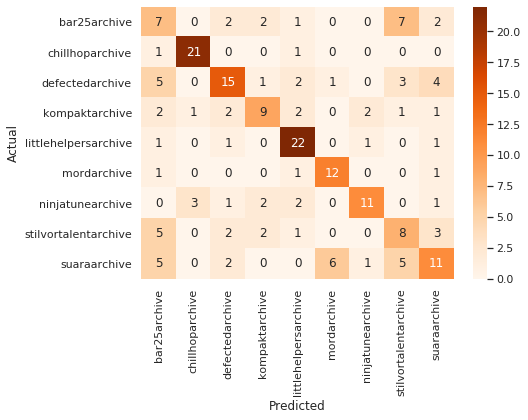

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.33      0.29        21
           1       0.84      0.91      0.87        23
           2       0.60      0.48      0.54        31
           3       0.56      0.45      0.50        20
           4       0.69      0.85      0.76        26
           5       0.63      0.80      0.71        15
           6       0.73      0.55      0.63        20
           7       0.33      0.38      0.36        21
           8       0.46      0.37      0.41        30

    accuracy                           0.56       207
   macro avg       0.57      0.57      0.56       207
weighted avg       0.57      0.56      0.56       207



In [26]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.4396135265700483

## Other ML FW


In [ ]:
import warnings
warnings.filterwarnings('ignore')#suppress warnings
#importing various classifiers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma = 1 / (X_train.shape[-1] * X_train.var())),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()]

names = ["KNN", "Linear SVM", "Gaussian Process","Neural Net", "Naive Bayes"] #"RBF SVM"

#Creating empty list of scores for each classifier, we will append test results to these lists 
scores = {}
for name in names:
    scores[name] = []

#Let's split our data into test and train
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

#Let's run 10 random experiments, collect scores for each classifier 
num_tests = 10
for iteration_number in range(num_tests):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 1/num_tests, random_state = iteration_number)
    #normalisation of the data (learned from training data, applied to test data)
    scaler = StandardScaler().fit(x_train)
    norm_x_train = scaler.transform(x_train)
    norm_x_val = scaler.transform(x_val)
    
    # test over each classifier
    for name, clf in zip(names, classifiers):
        clf.fit(norm_x_train, y_train)#train
        score = clf.score(norm_x_val, y_val)#test
        scores[name].append(score)

for name, score in scores.items():
    print("{0}: acc = {1:1.2f}, +-{2:1.2f},\tvalues: {3}".format(name, np.mean(score), np.std(score), np.around(score, decimals = 2)))

### How about Deep Learning?

We would often prefer deep learning based architectures when the data size is large. See Andrew Ng's figure from his [Coursera course](https://www.coursera.org/learn/neural-networks-deep-learning/):

<img src=https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/1-%20Neural%20Networks%20and%20Deep%20Learning/Images/11.png width="700">

The data size in our case is small and the methods examplified above are just fine. Below, for the sake of presenting an example using a deep learning architecture, we build (with Keras) and train a DNN using the same features. For cases with larger data sets, feature extraction step can be dropped and end-to-end systems(audio->label) can be designed. Due to the size of our data, we will stick with our features.


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

Our neural network will have 4 neurons at the output layer each of which will output the estimated probability of the sample belonging to a class. So, let's convert our labels to **one-hot encoding** to fit to that representation.
Example: a sample belonging to the 'violin' class is represented with 3 (integer encoded) will be represented with  [0 0 0 1]. Similarly, a 'ebclar' sample represented with with 0 will be represented with [1 0 0 0]

In [68]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (828, 9)
One-hot encoded y_test shape =  (207, 9)


**Let's define our deep learning architecture**

In [30]:
!pip3 install keras

You should consider upgrading via the '/mnt/vmdata/users/gnaimeh/geo/bin/python3 -m pip install --upgrade pip' command.


In [31]:
!pip3 install tensorflow

You should consider upgrading via the '/mnt/vmdata/users/gnaimeh/geo/bin/python3 -m pip install --upgrade pip' command.


In [69]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 50))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

You can have a look at the summary of the model

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 100)               400       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               11110     
_________________________________________________________________
batch_normalization_5 (Batch (None, 110)               440       
_________________________________________________________________
activation_7 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 50)                5550      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50)               

Let's pick an optimizer, compile the model and train the network

from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['acc'])

In [71]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0,)

Testing the trained model

In [72]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1837727770137325
Test accuracy: 0.6135265827178955


It is a good and common practice to check the learning curves

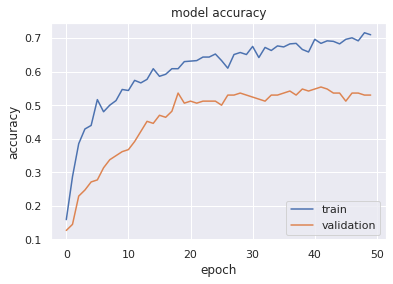

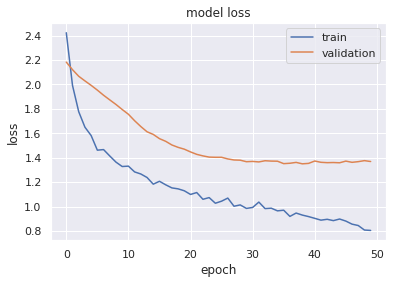

In [73]:
# summarize history for accuracy
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [74]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

91


In [75]:
y_pred = y.argmax(axis=1)

In [76]:
sklearn.metrics.f1_score(y_test, y_pred, average='micro')

0.6135265700483091

In [77]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.3864734299516908

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        21
           1       0.87      0.87      0.87        23
           2       0.67      0.58      0.62        31
           3       0.64      0.35      0.45        20
           4       0.62      0.92      0.74        26
           5       0.65      0.73      0.69        15
           6       0.52      0.75      0.61        20
           7       0.41      0.52      0.46        21
           8       0.72      0.43      0.54        30

    accuracy                           0.61       207
   macro avg       0.62      0.62      0.60       207
weighted avg       0.63      0.61      0.60       207



**Saving the model**

In [40]:
model.save("boc_60s/kerasmodel60s.h5")
print("Model Saved")

Model Saved


## Model Prediction on New Data

In [58]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('boc_60s/kerasmodel60s.h5')
# summarize model.
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 1)                 111       
_________________________________________________________________
batch_normalization_3 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 3)                 6         
_________________________________________________________________
batch_normalization_4 (Batch (None, 3)                

In [ ]:
# load dataset
dataset = loadtxt("boc_60s/data_1mn_only_9.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))